In [1]:
import os

import pandas as pd
import numpy as np

import sys
sys.path.append("..")

from plot import plot_segment_grid

In [2]:
os.getcwd()

'c:\\Users\\erich\\Desktop\\HYU\\신용카드 고객 세그먼트 분류 공모전\\eda\\1.회원정보'

In [3]:
customers = []

months = [7, 8, 9, 10, 11, 12]

for month in months:
    # train = pd.read_parquet(f"../data/train/1.회원정보/2018{month:02}_train_회원정보.parquet")
    # test = pd.read_parquet(f"../data/test/1.회원정보/2018{month:02}_test_회원정보.parquet")
    # customers.append(pd.concat([train, test], ignore_index=True))

    customers.append(pd.read_parquet(f"../../data/train/1.회원정보/2018{month:02}_train_회원정보.parquet"))

## Segment

### 모든 월에서 Segment가 같은지

In [7]:
from pandas.testing import assert_series_equal

prev = customers[0]["Segment"]
for month in months[1:]:
    cur = customers[month - 7]["Segment"]

    assert_series_equal(prev, cur)  # 같으면 조용히 넘어감

    prev = cur


전부 다 조용히 넘어 갔기에, 모두 Segment가 같다는 것을 알 수 있음.

### Segment 인원 수 확인

In [8]:
customers[0]["Segment"].value_counts()

Segment
E    320342
D     58207
C     21265
A       162
B        24
Name: count, dtype: int64

뭔가 E가 제일 일반인들을 모아놓은 것 같음.

또한 클래스 별 비율 차이가 심하기 때문에, 오버샘플링 또는 언더샘플링을 통해 비율을 어느정도는 맞춰줄 필요가 있어보임

## 사전 요약
- 회원여부_이용가능 : E와 다른 Segment가 구분이 잘 될 것으로 보임.
- 회원여부_이용가능_CA : 이것도 마찬가지로, Segment 별 나름 구분이 확실함.
- 회원여부_이용가능_카드론 : 이건 Segment 별로 큰 차이가 없어보임.
---
- 수신동의여부, 마케팅동의여부 : 얘네들은 아마... 이걸로 Segment가 나뉘진 않을거지만, Segment 별로 또 차이가 좀 있음.

## 이용가능 여부

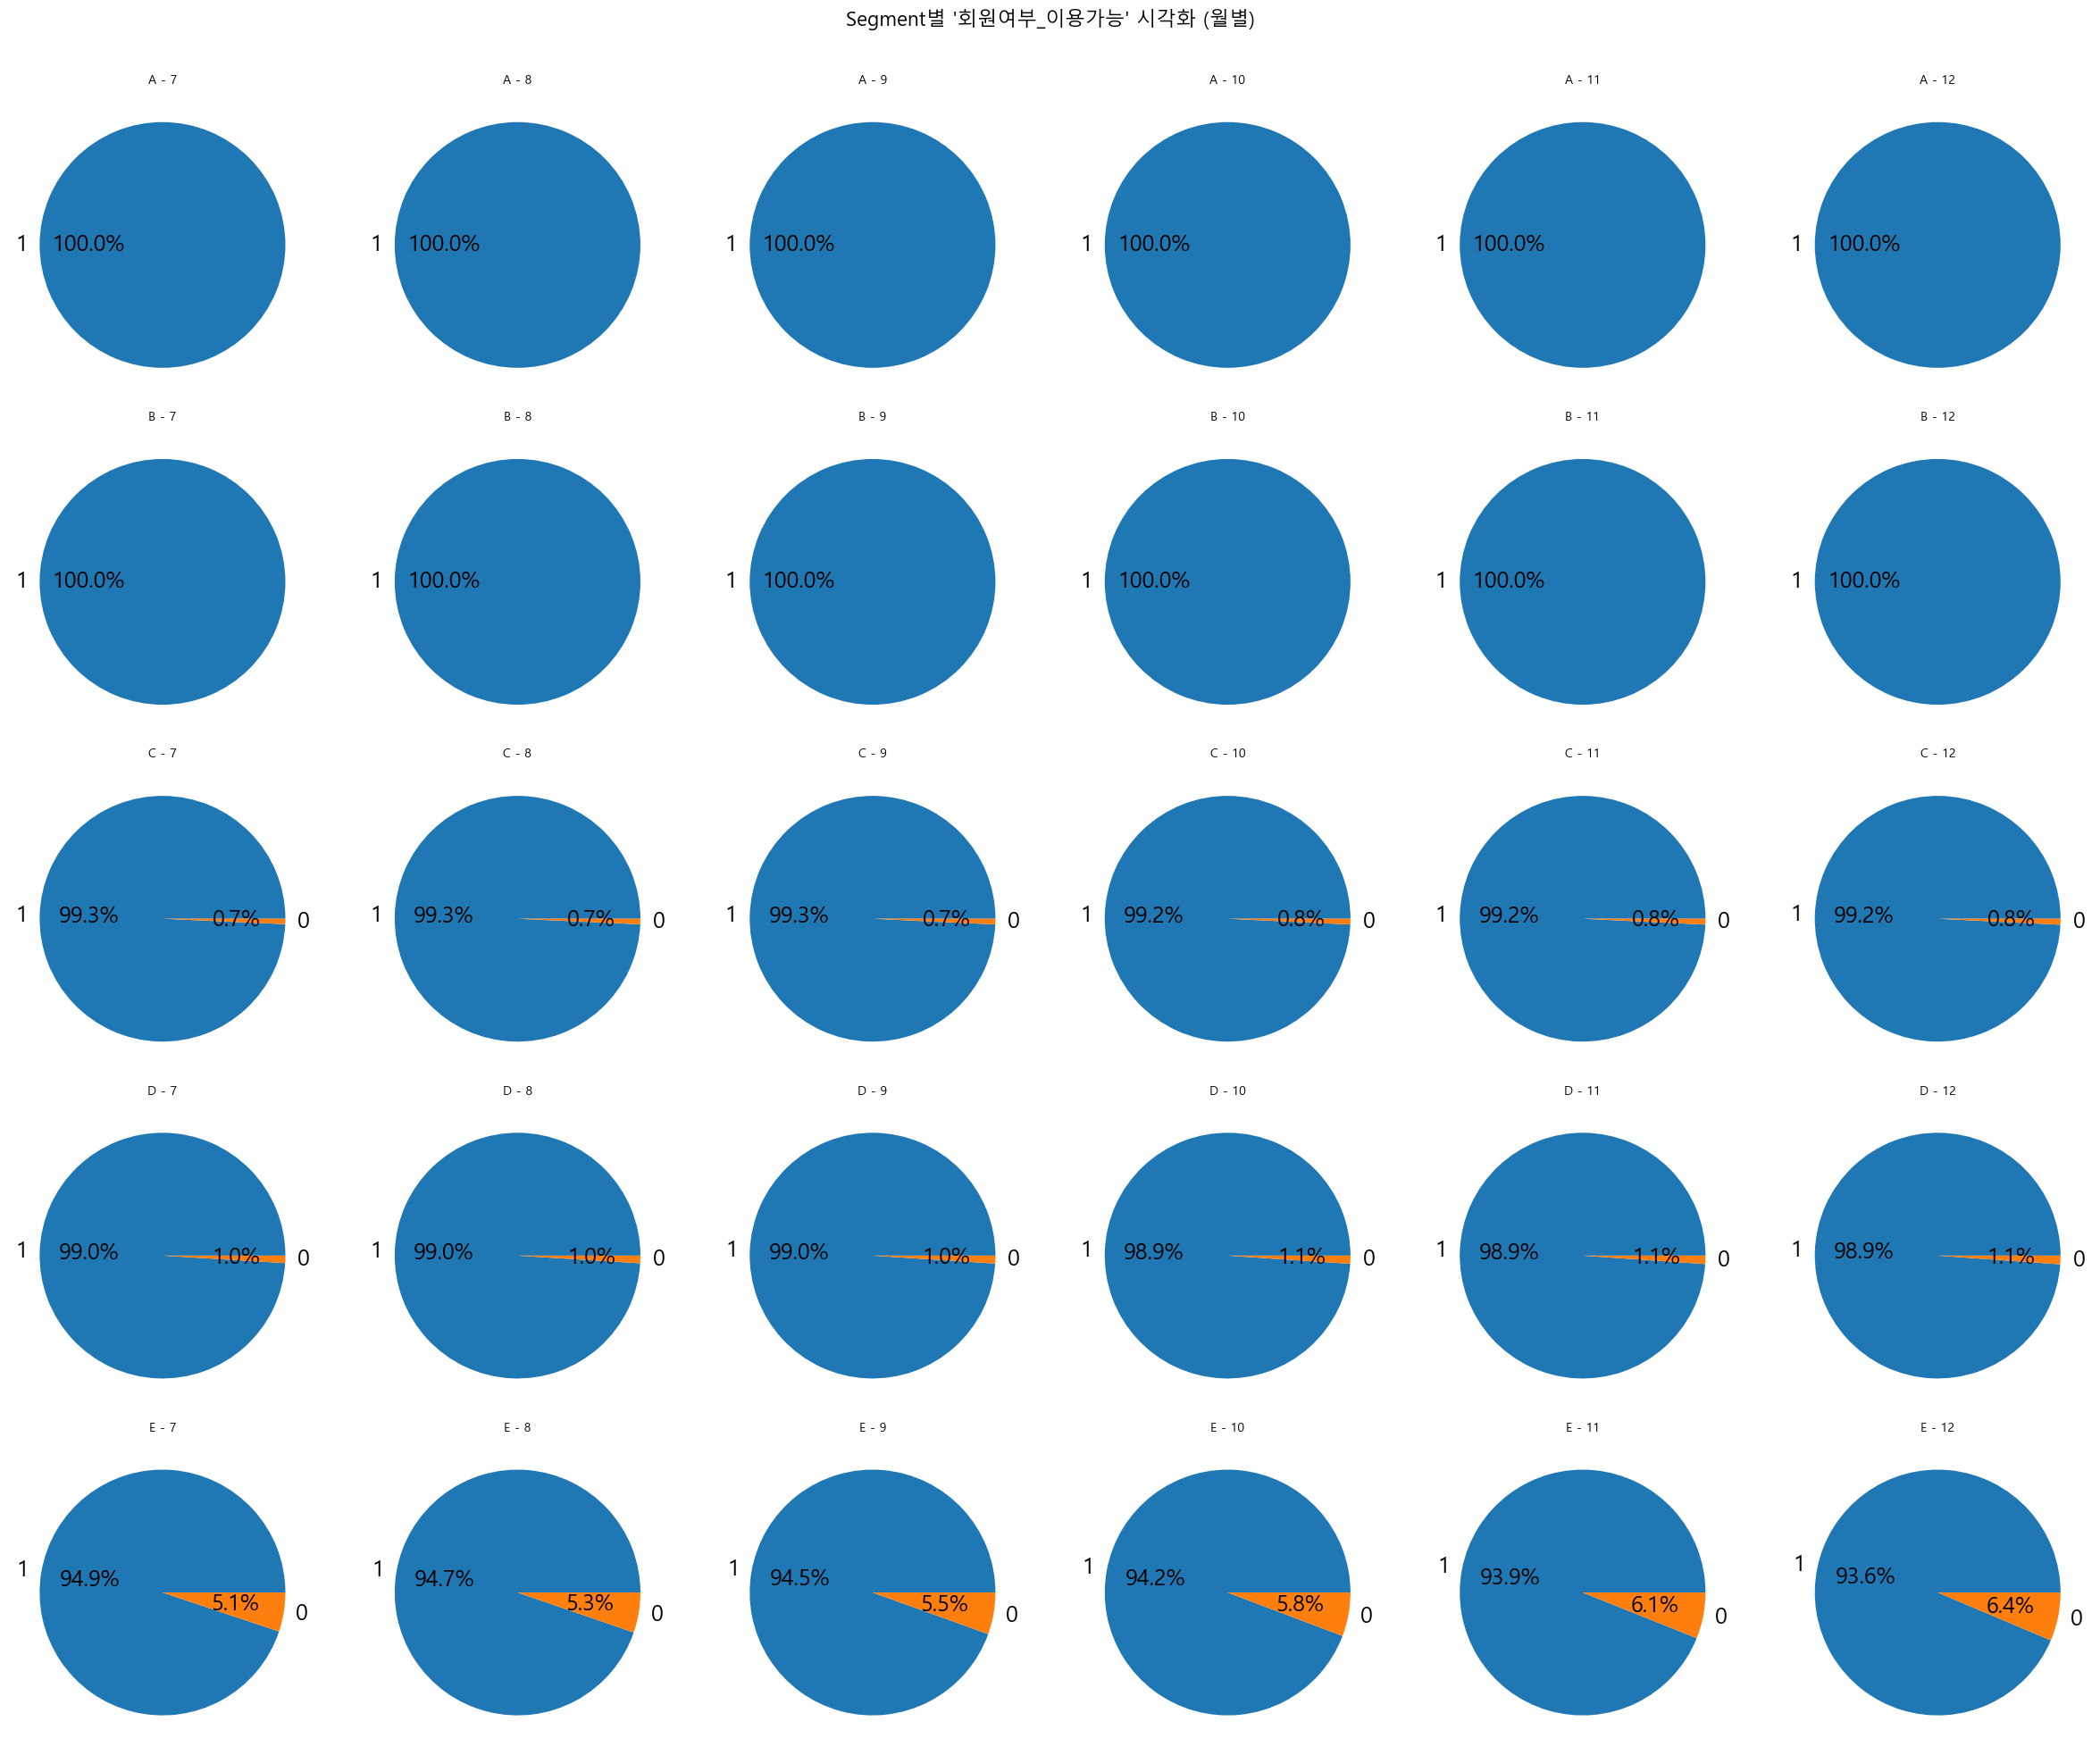

In [ ]:
plot_segment_grid(dfs = customers,
                  col = "회원여부_이용가능",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (4, 4))

A, B는 전부 이용가능 했음.

뭔진 모르겠지만...

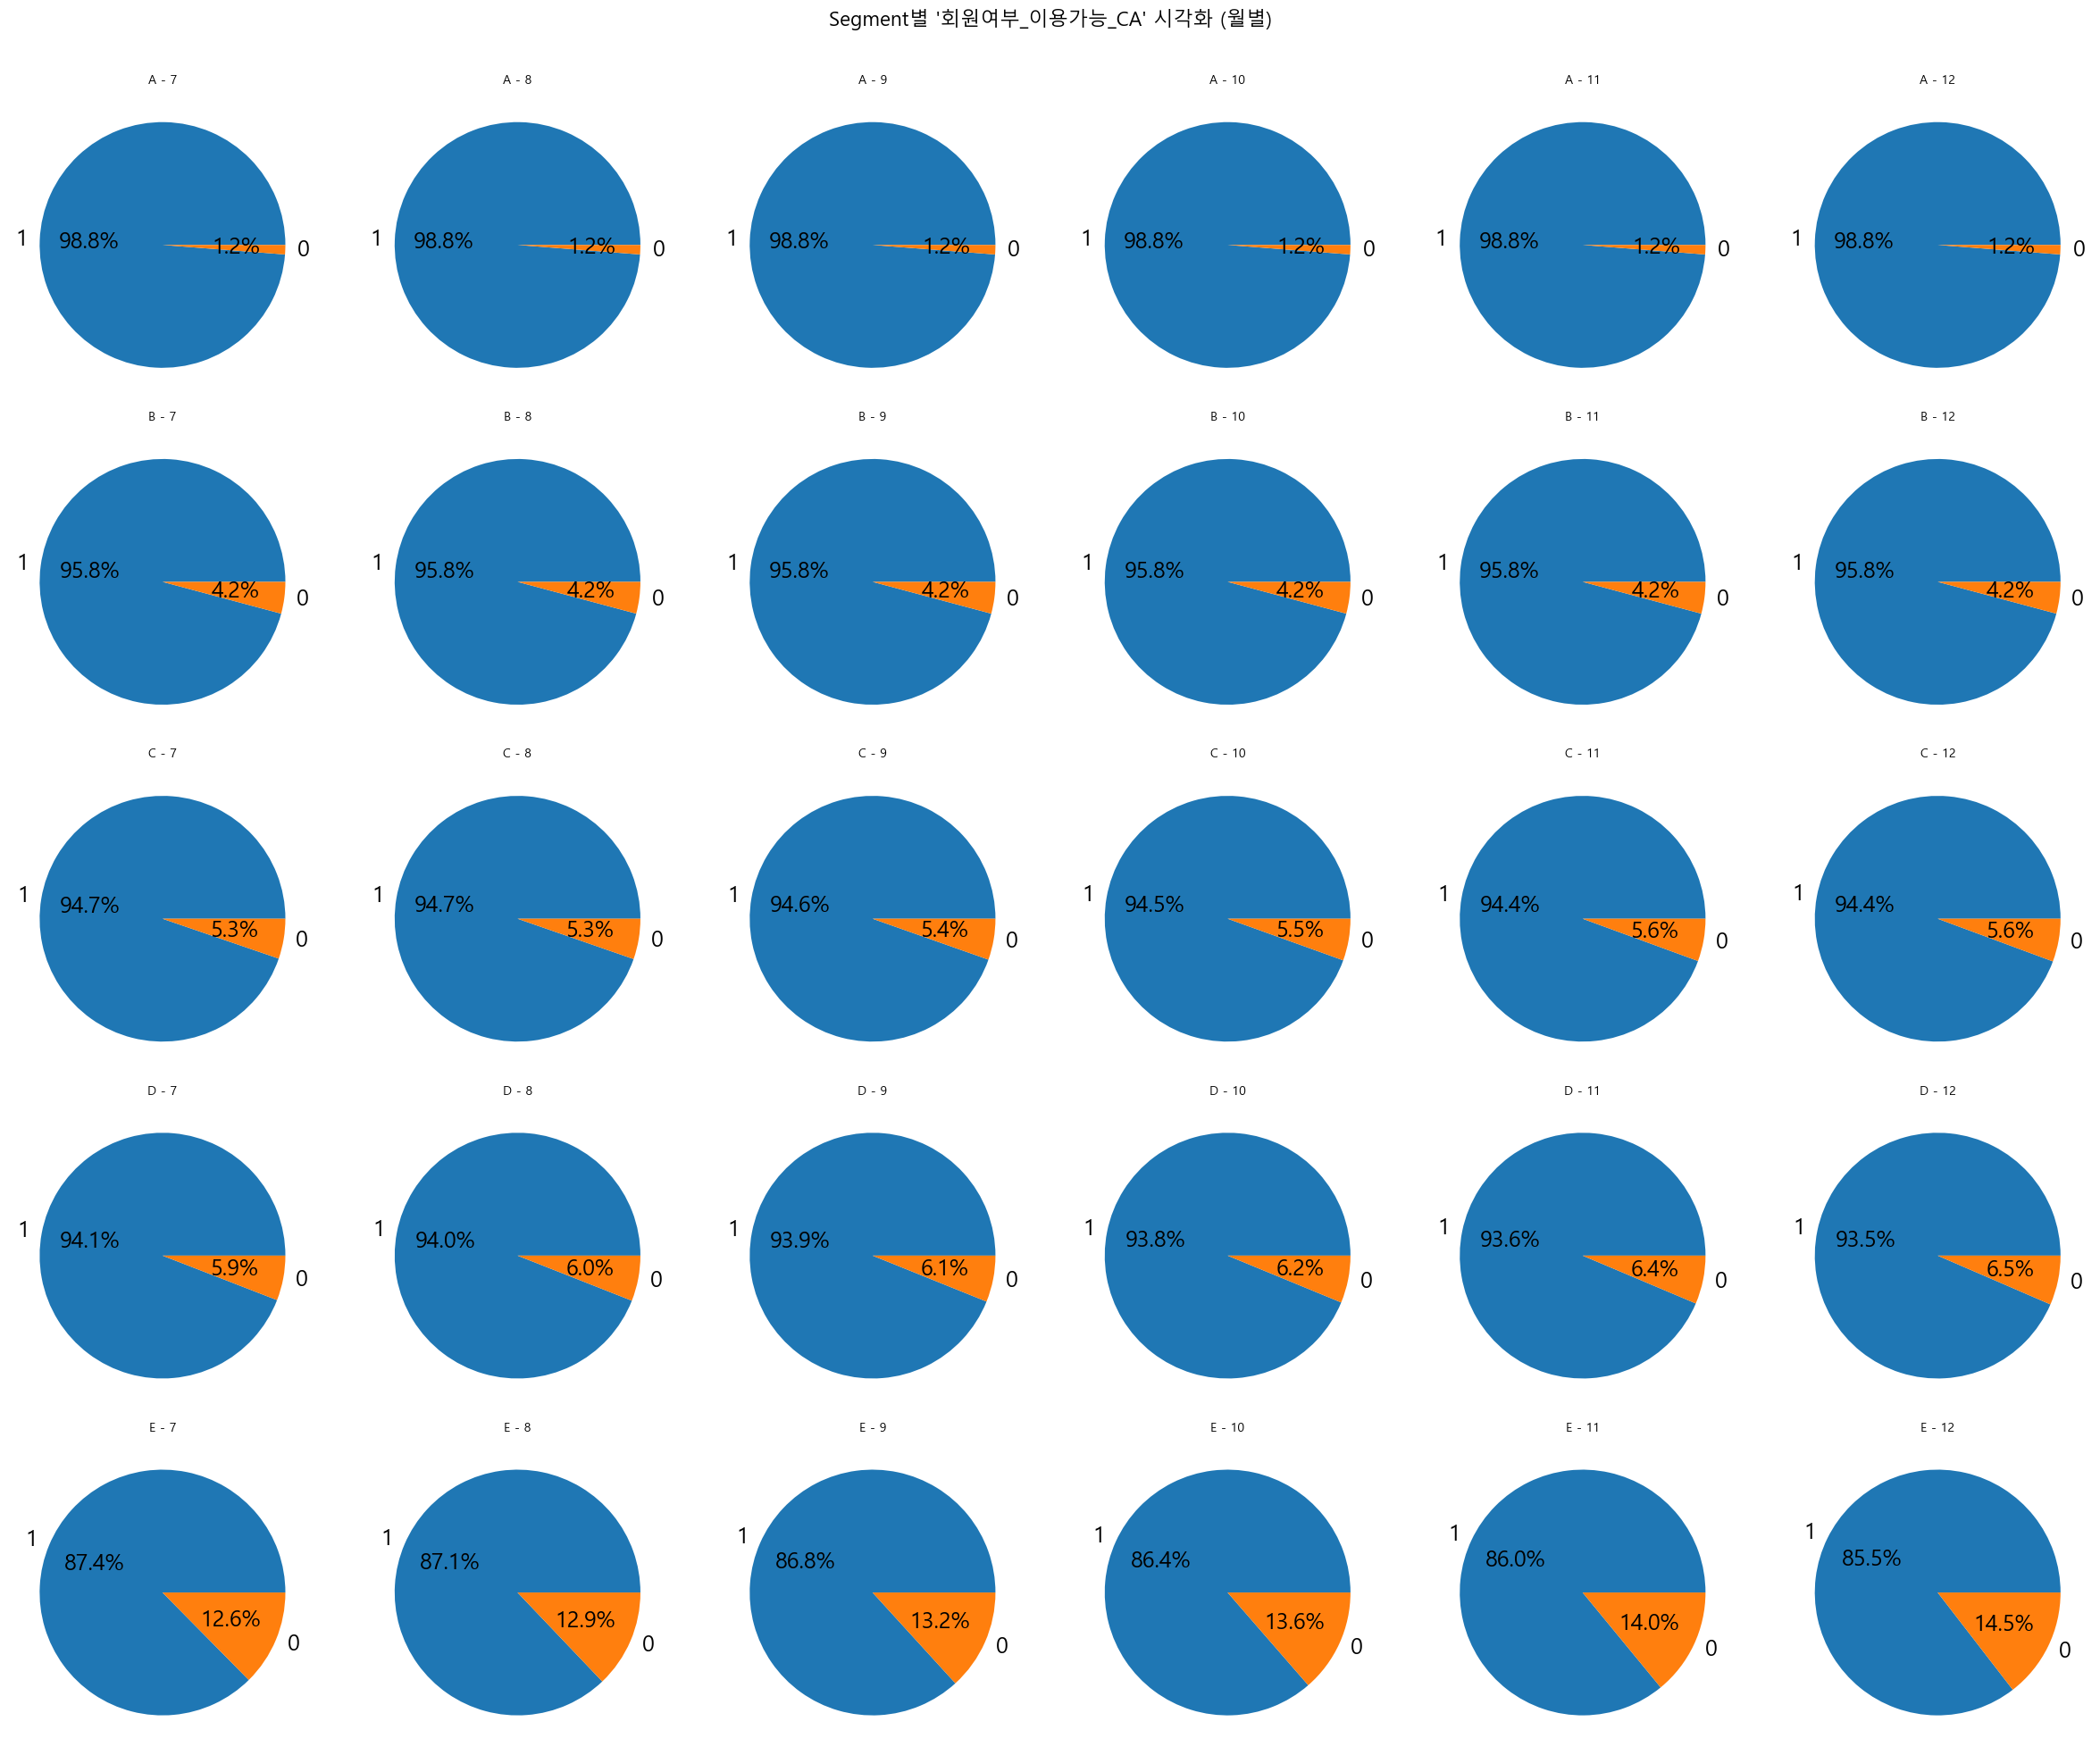

In [7]:
plot_segment_grid(dfs = customers,
                  col = "회원여부_이용가능_CA",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (4, 4))

CA의 경우 차이가 더 큼.

A, B에서는 빠지는 사람이 그렇게 많지 않은 것으로 보아

뭔가 VIP라고 추정 됨.

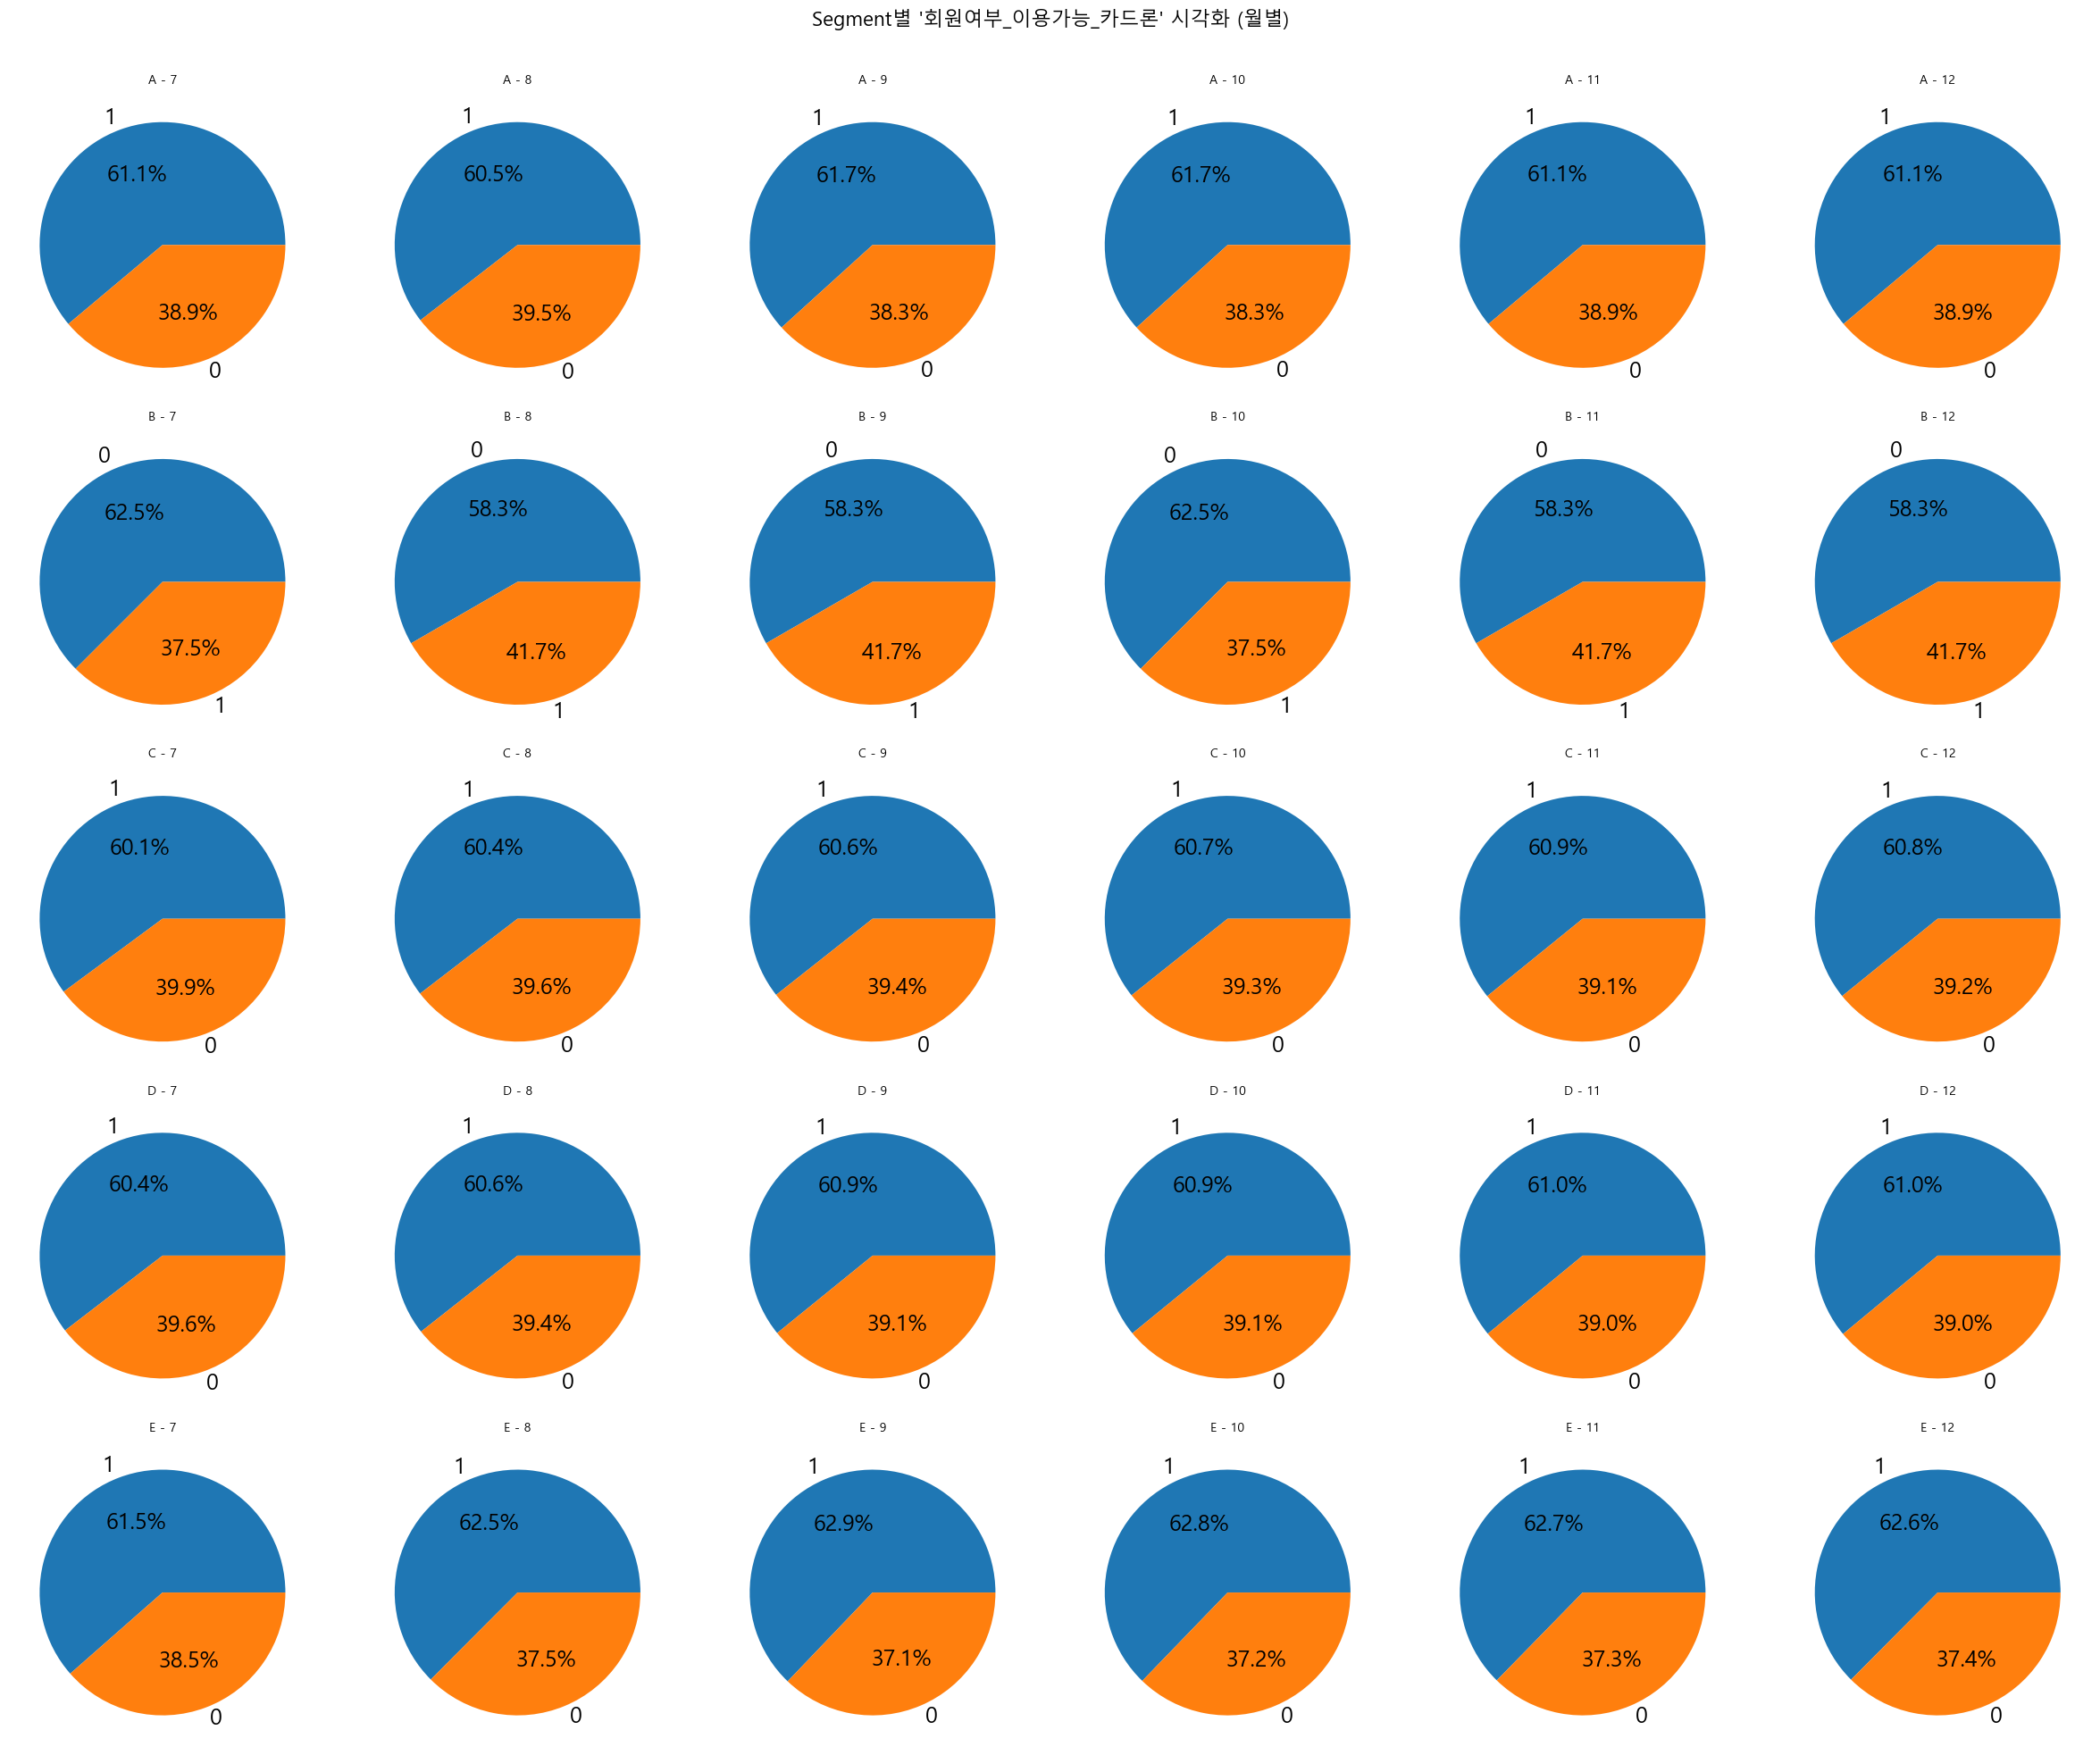

In [8]:
plot_segment_grid(dfs = customers,
                  col = "회원여부_이용가능_카드론",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (4, 4))

## 수신 거부 여부, 마케팅 동의 여부

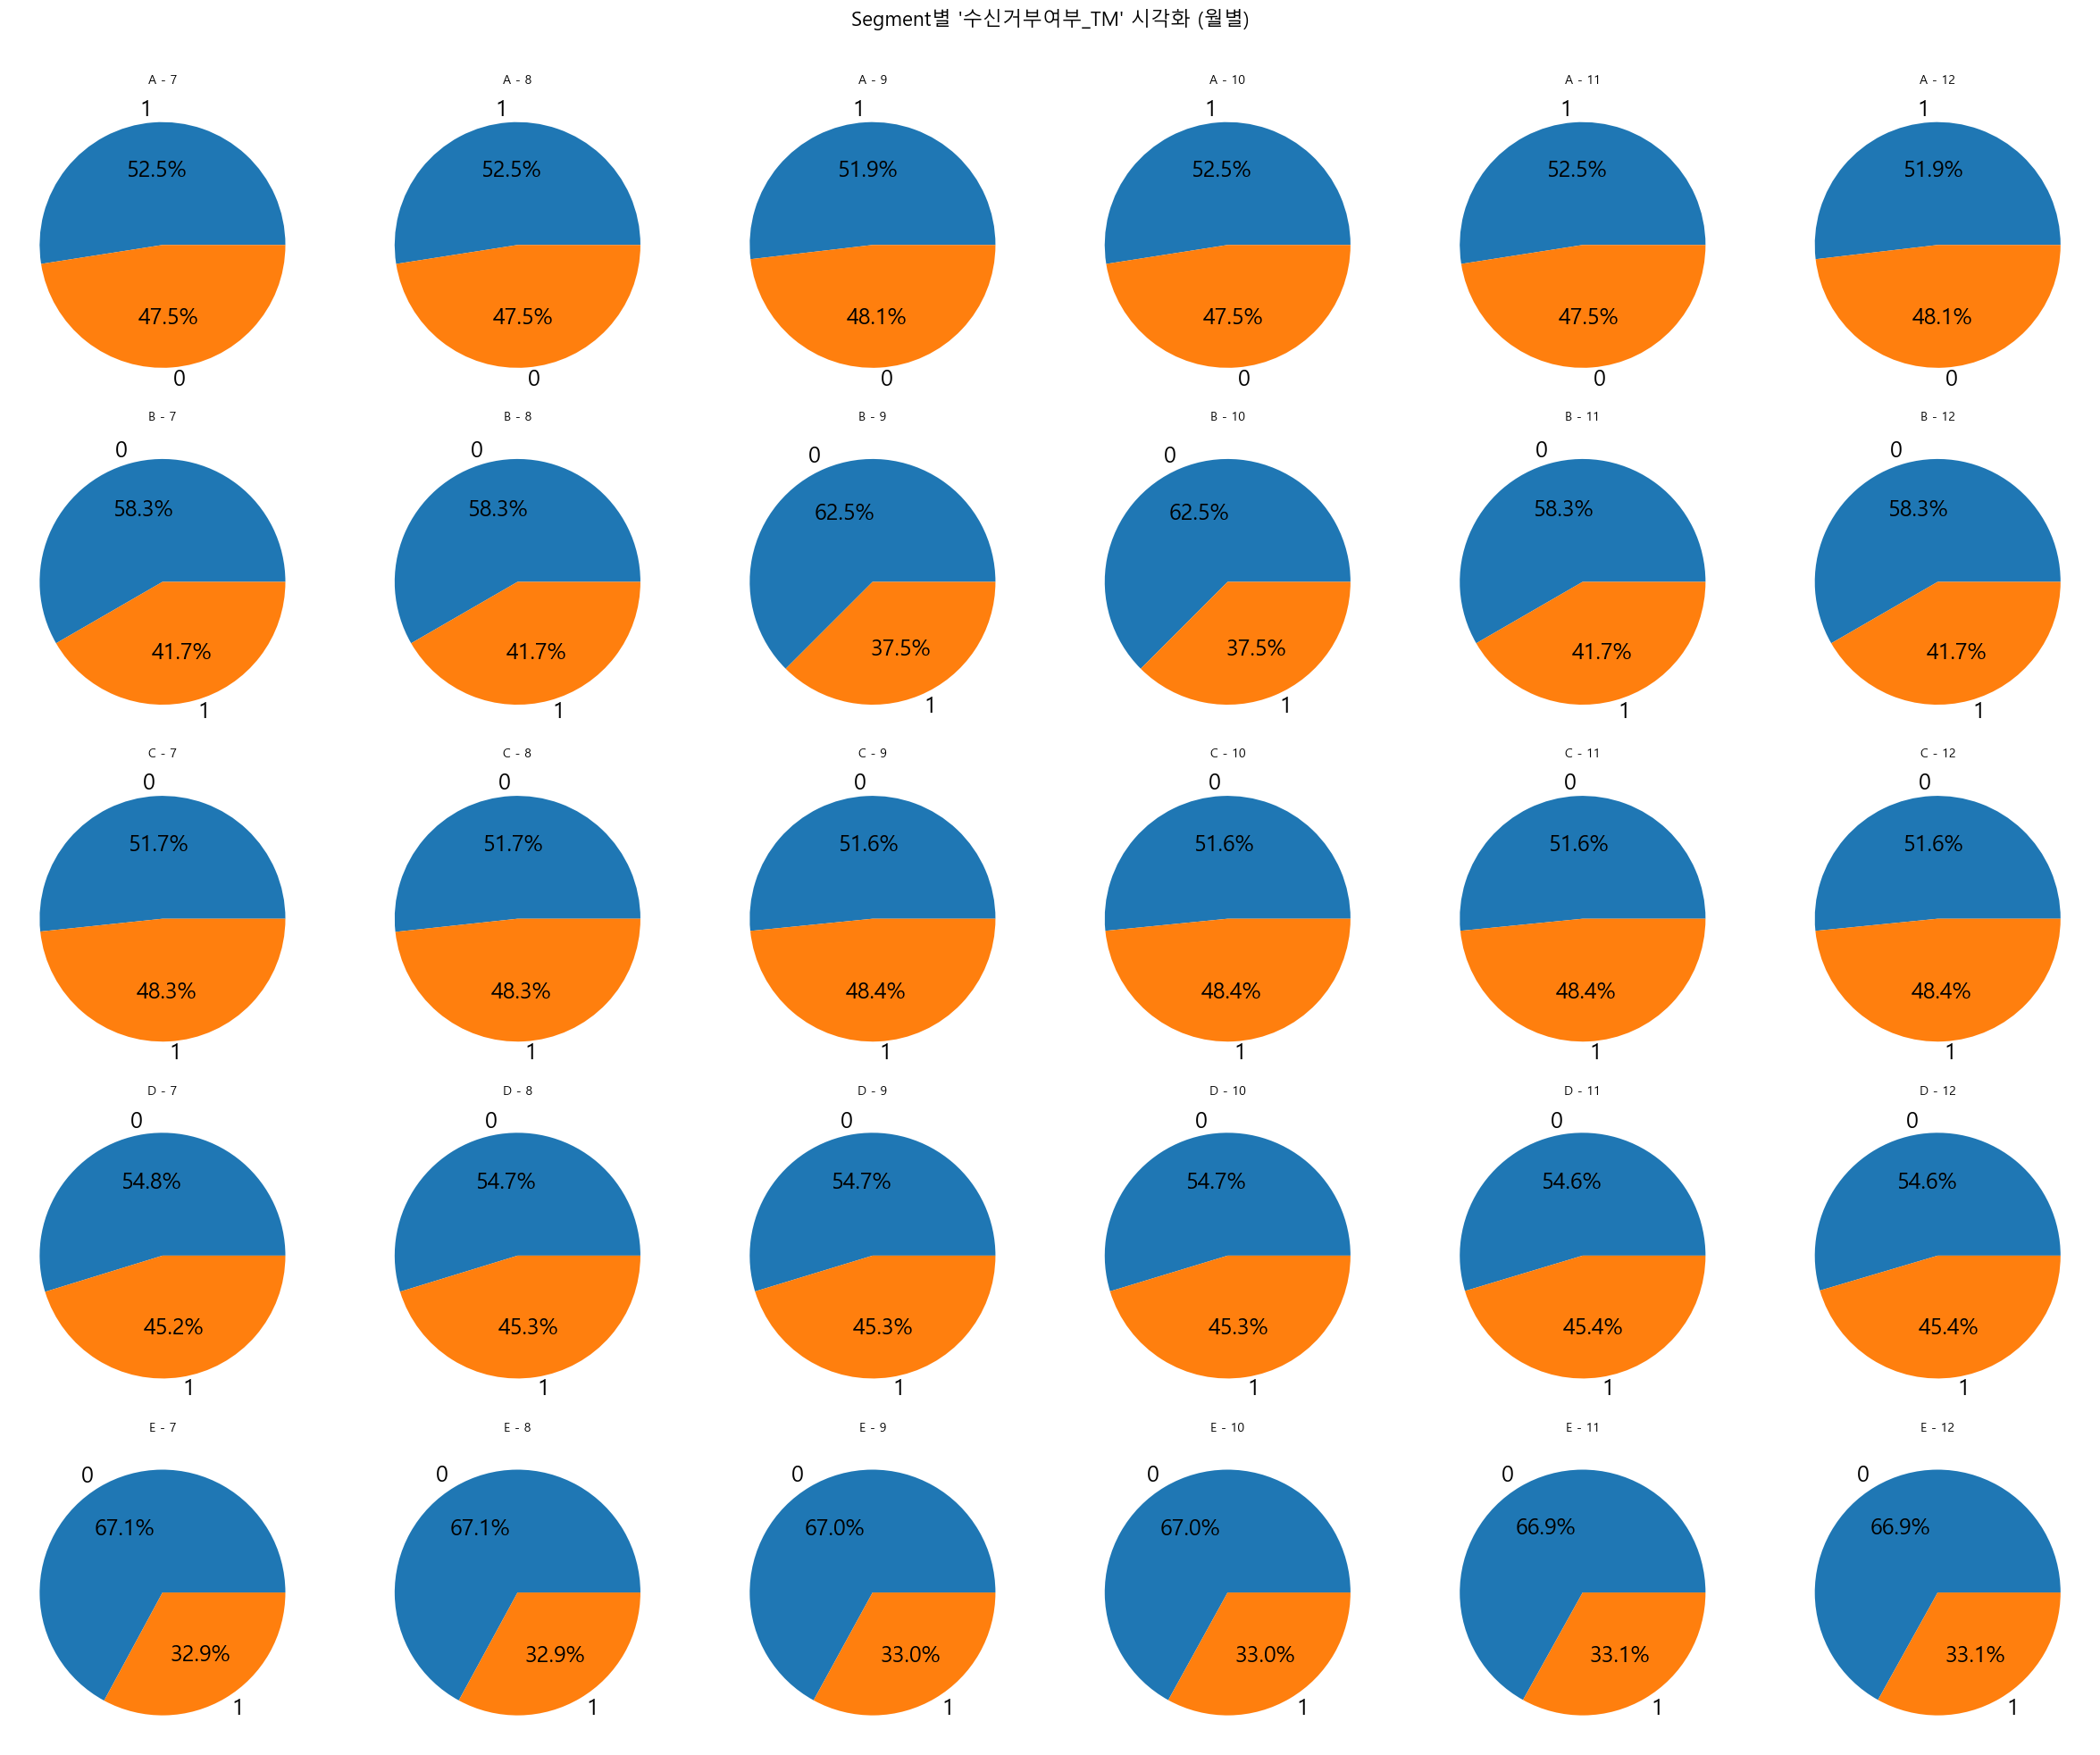

In [9]:
plot_segment_grid(dfs = customers,
                  col = "수신거부여부_TM",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (4, 4))

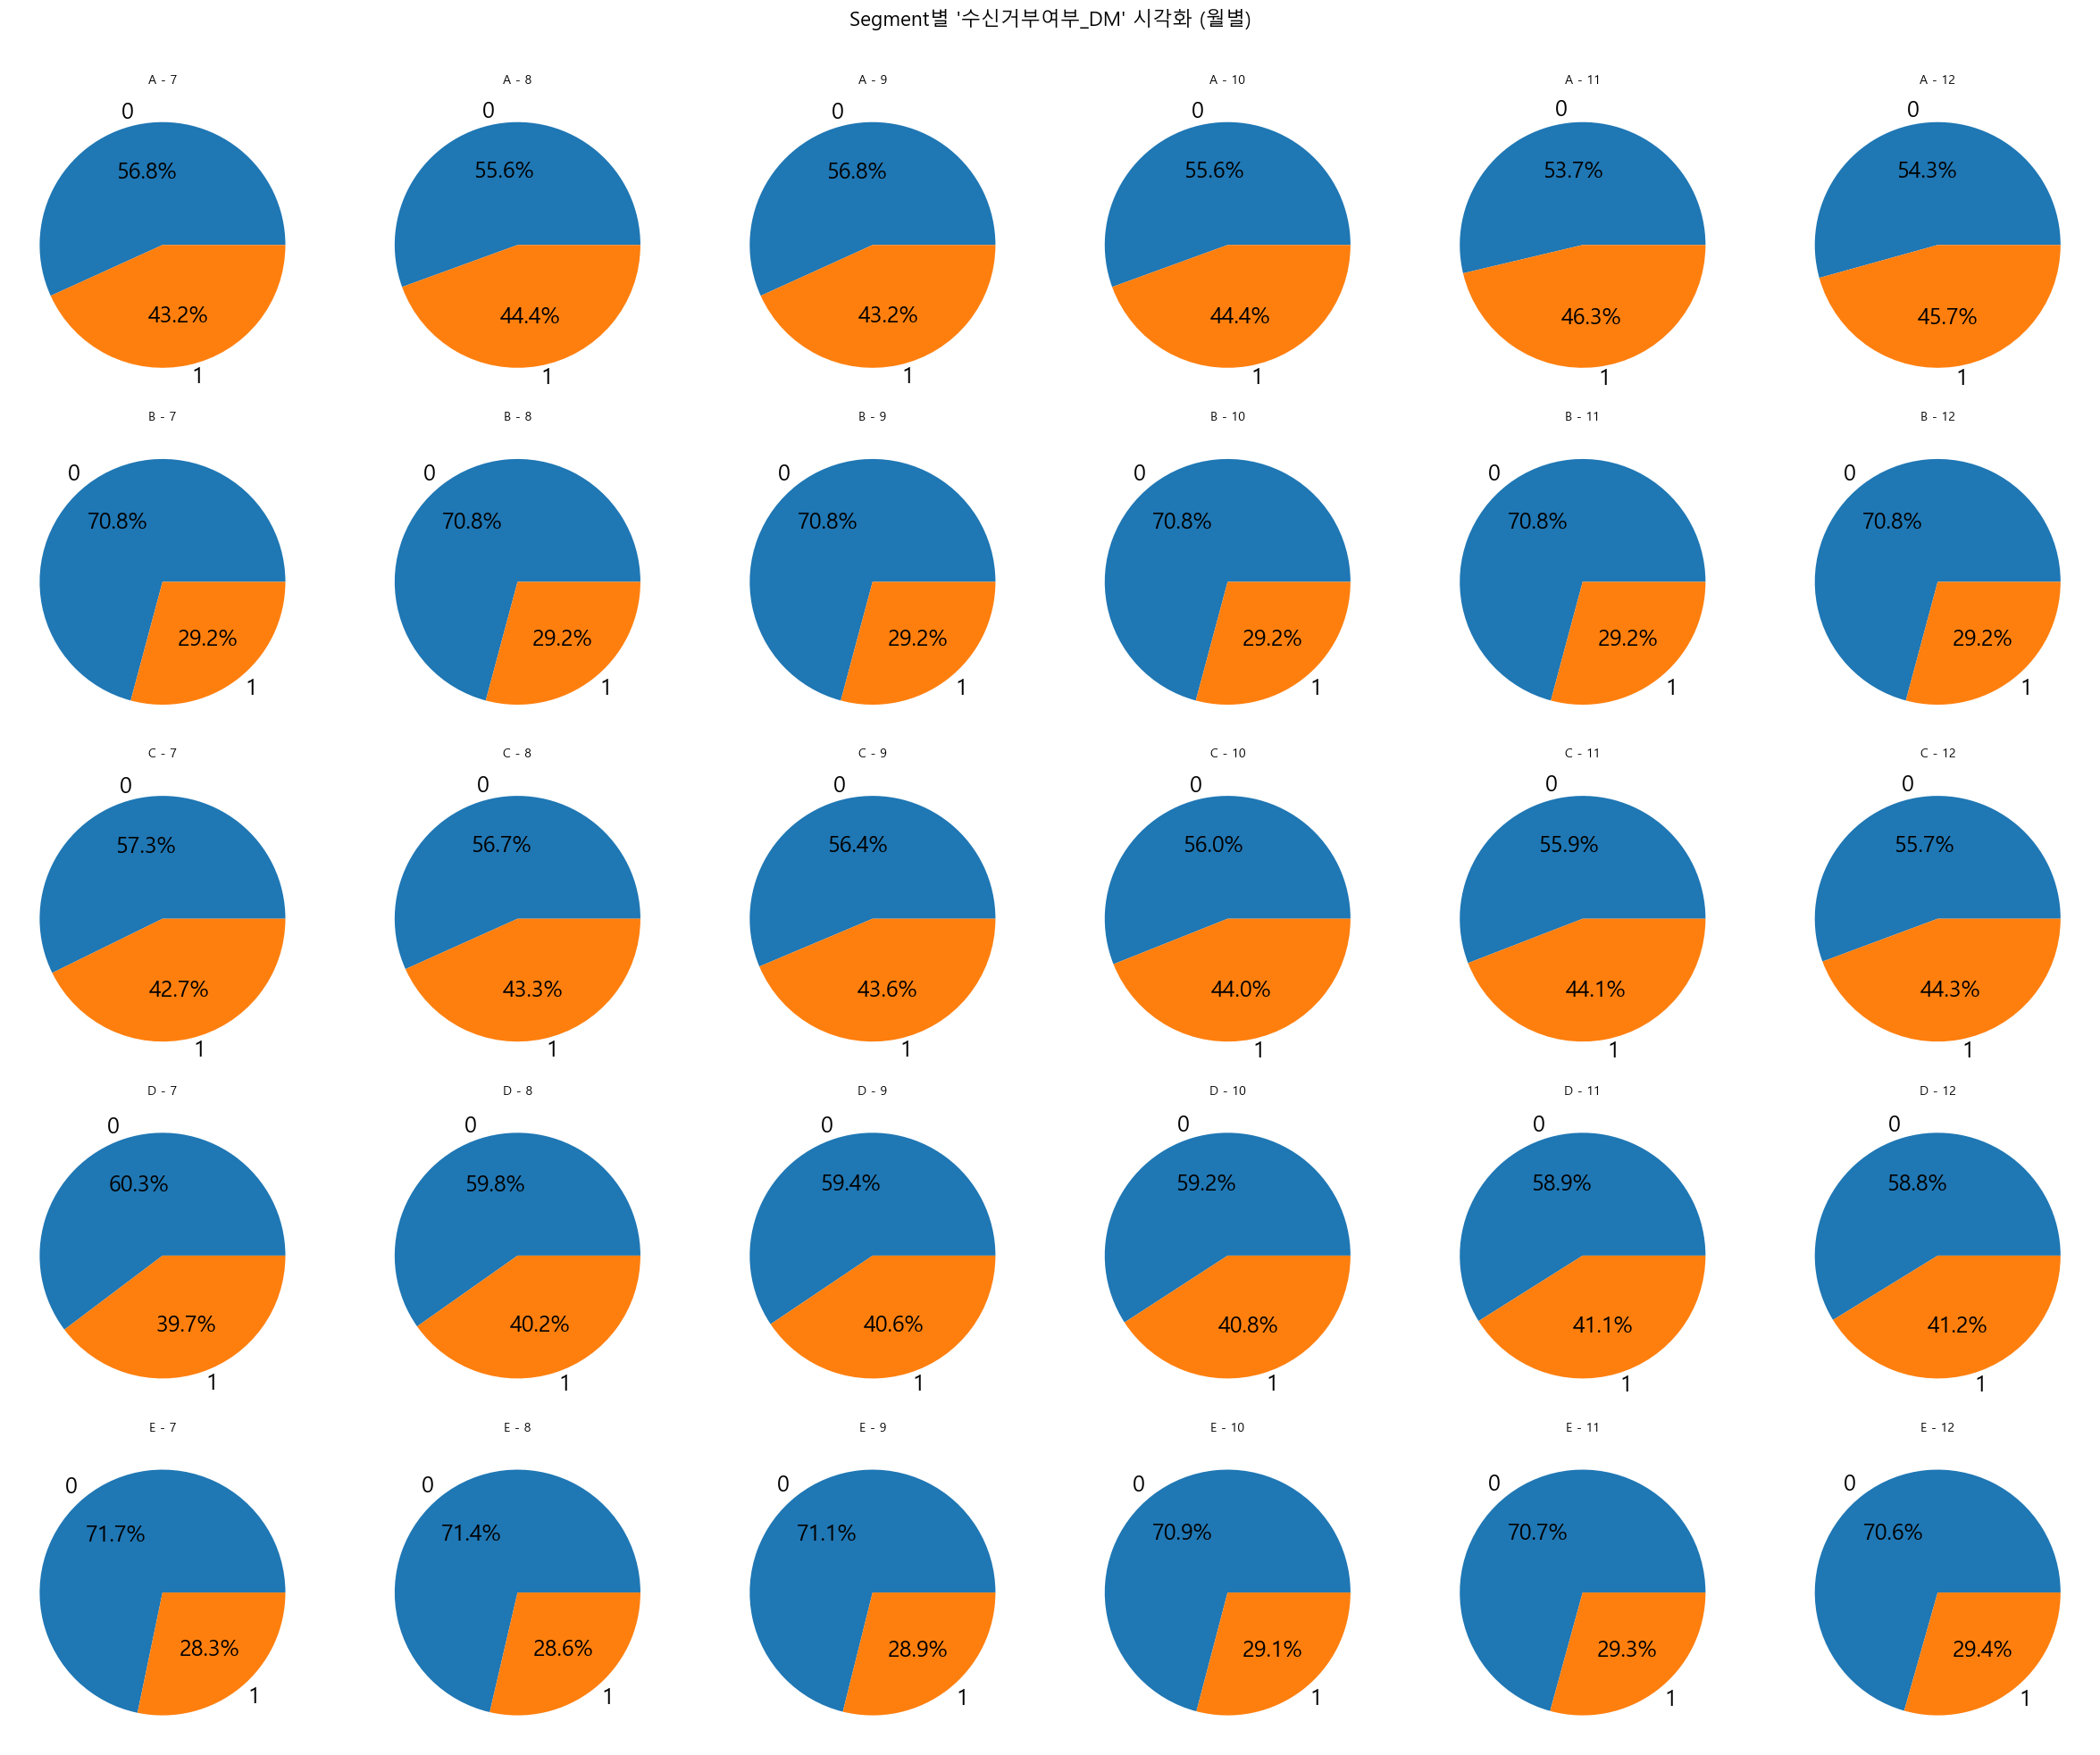

In [4]:
plot_segment_grid(dfs = customers,
                  col = "수신거부여부_DM",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (4, 4))

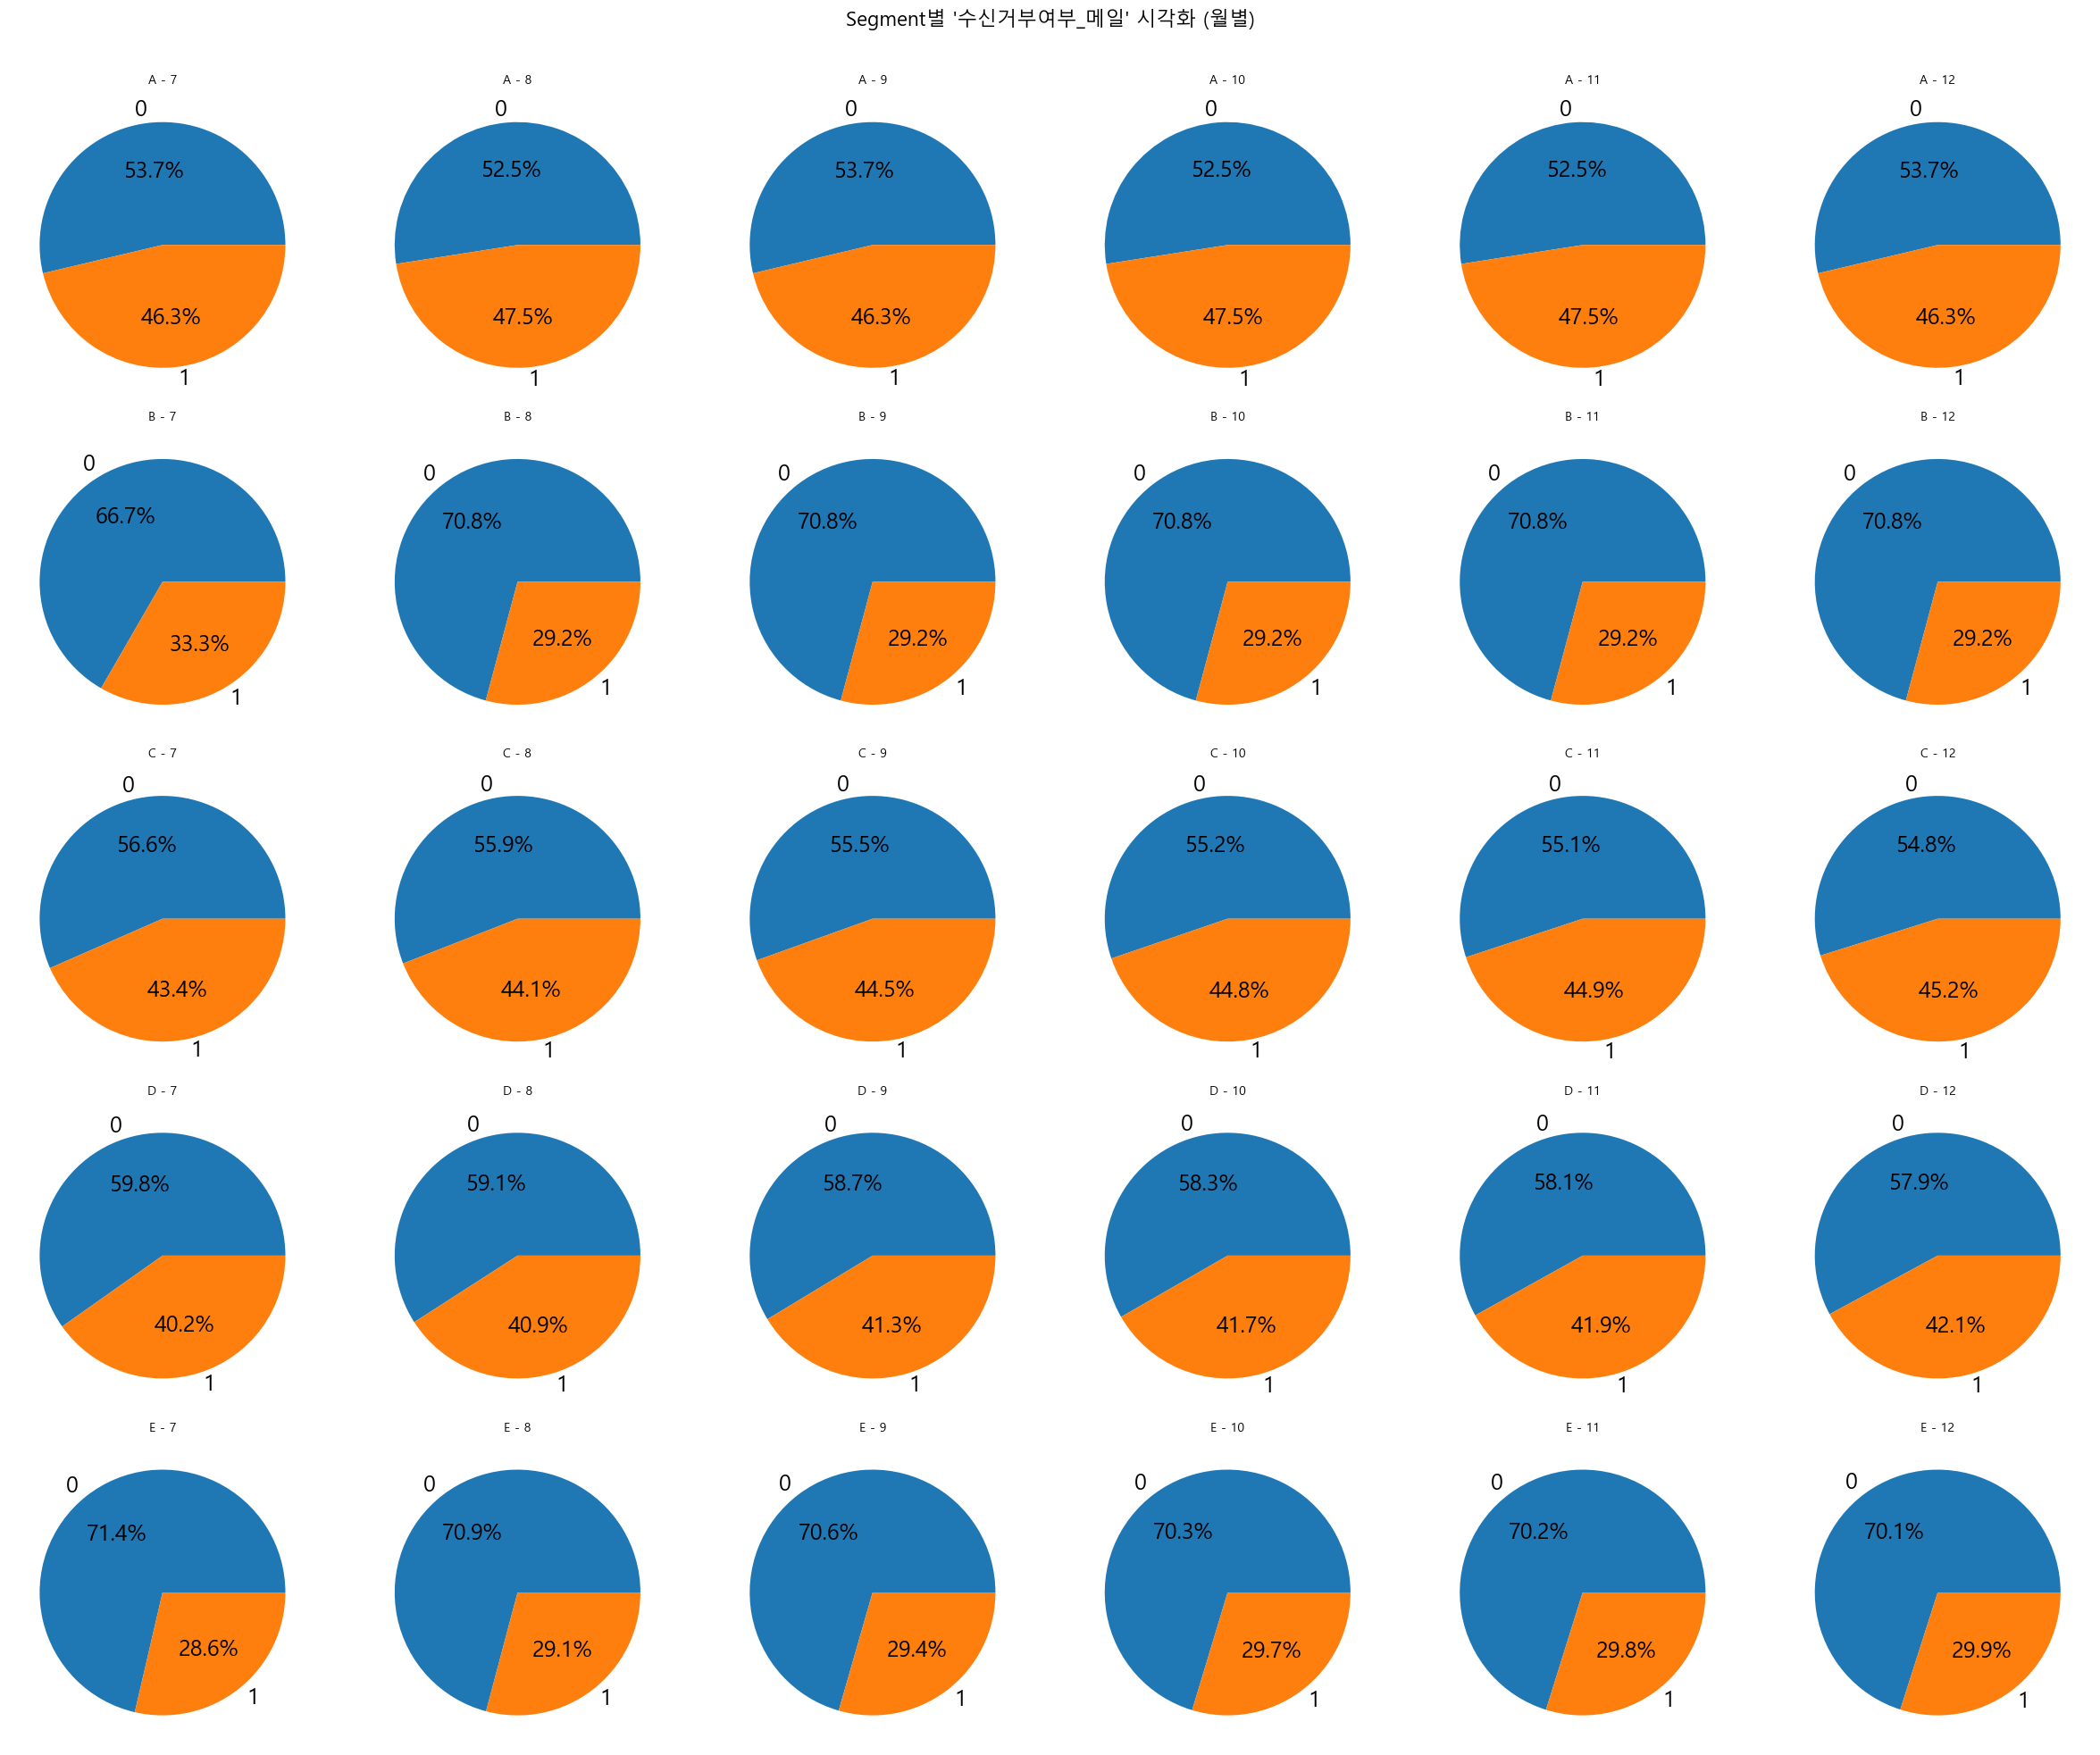

In [5]:
plot_segment_grid(dfs = customers,
                  col = "수신거부여부_메일",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (4, 4))

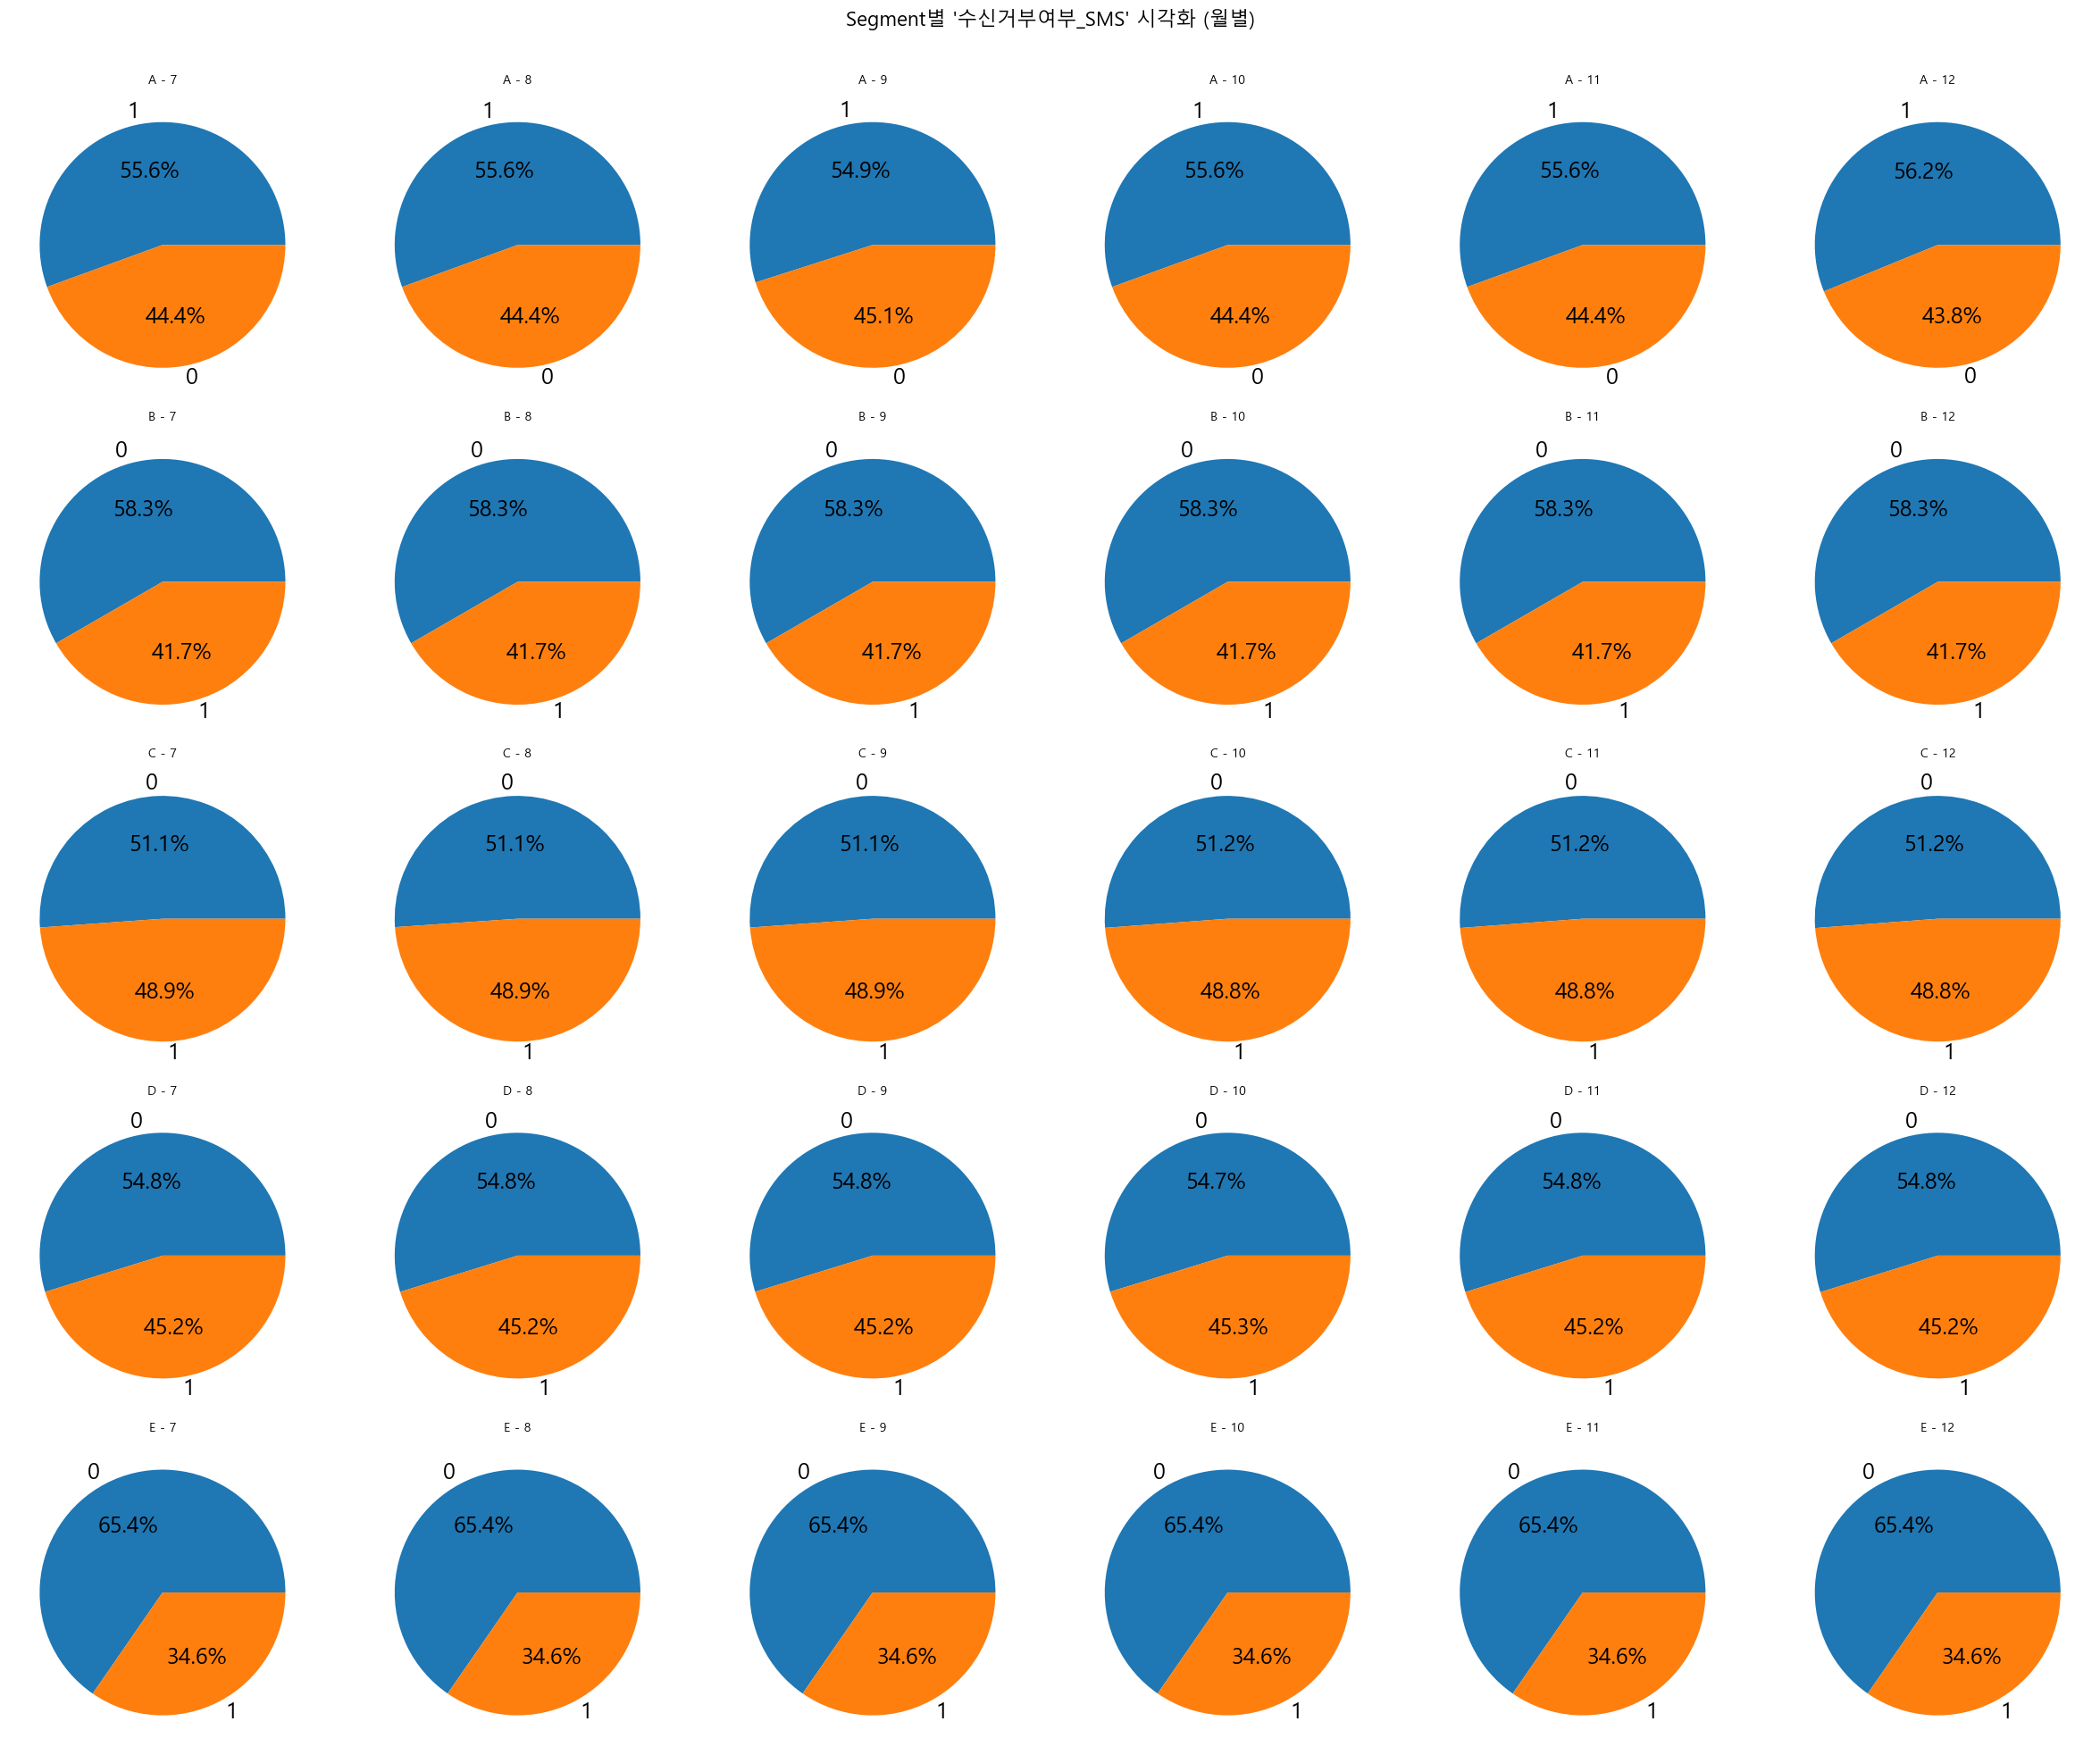

In [6]:
plot_segment_grid(dfs = customers,
                  col = "수신거부여부_SMS",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (4, 4))

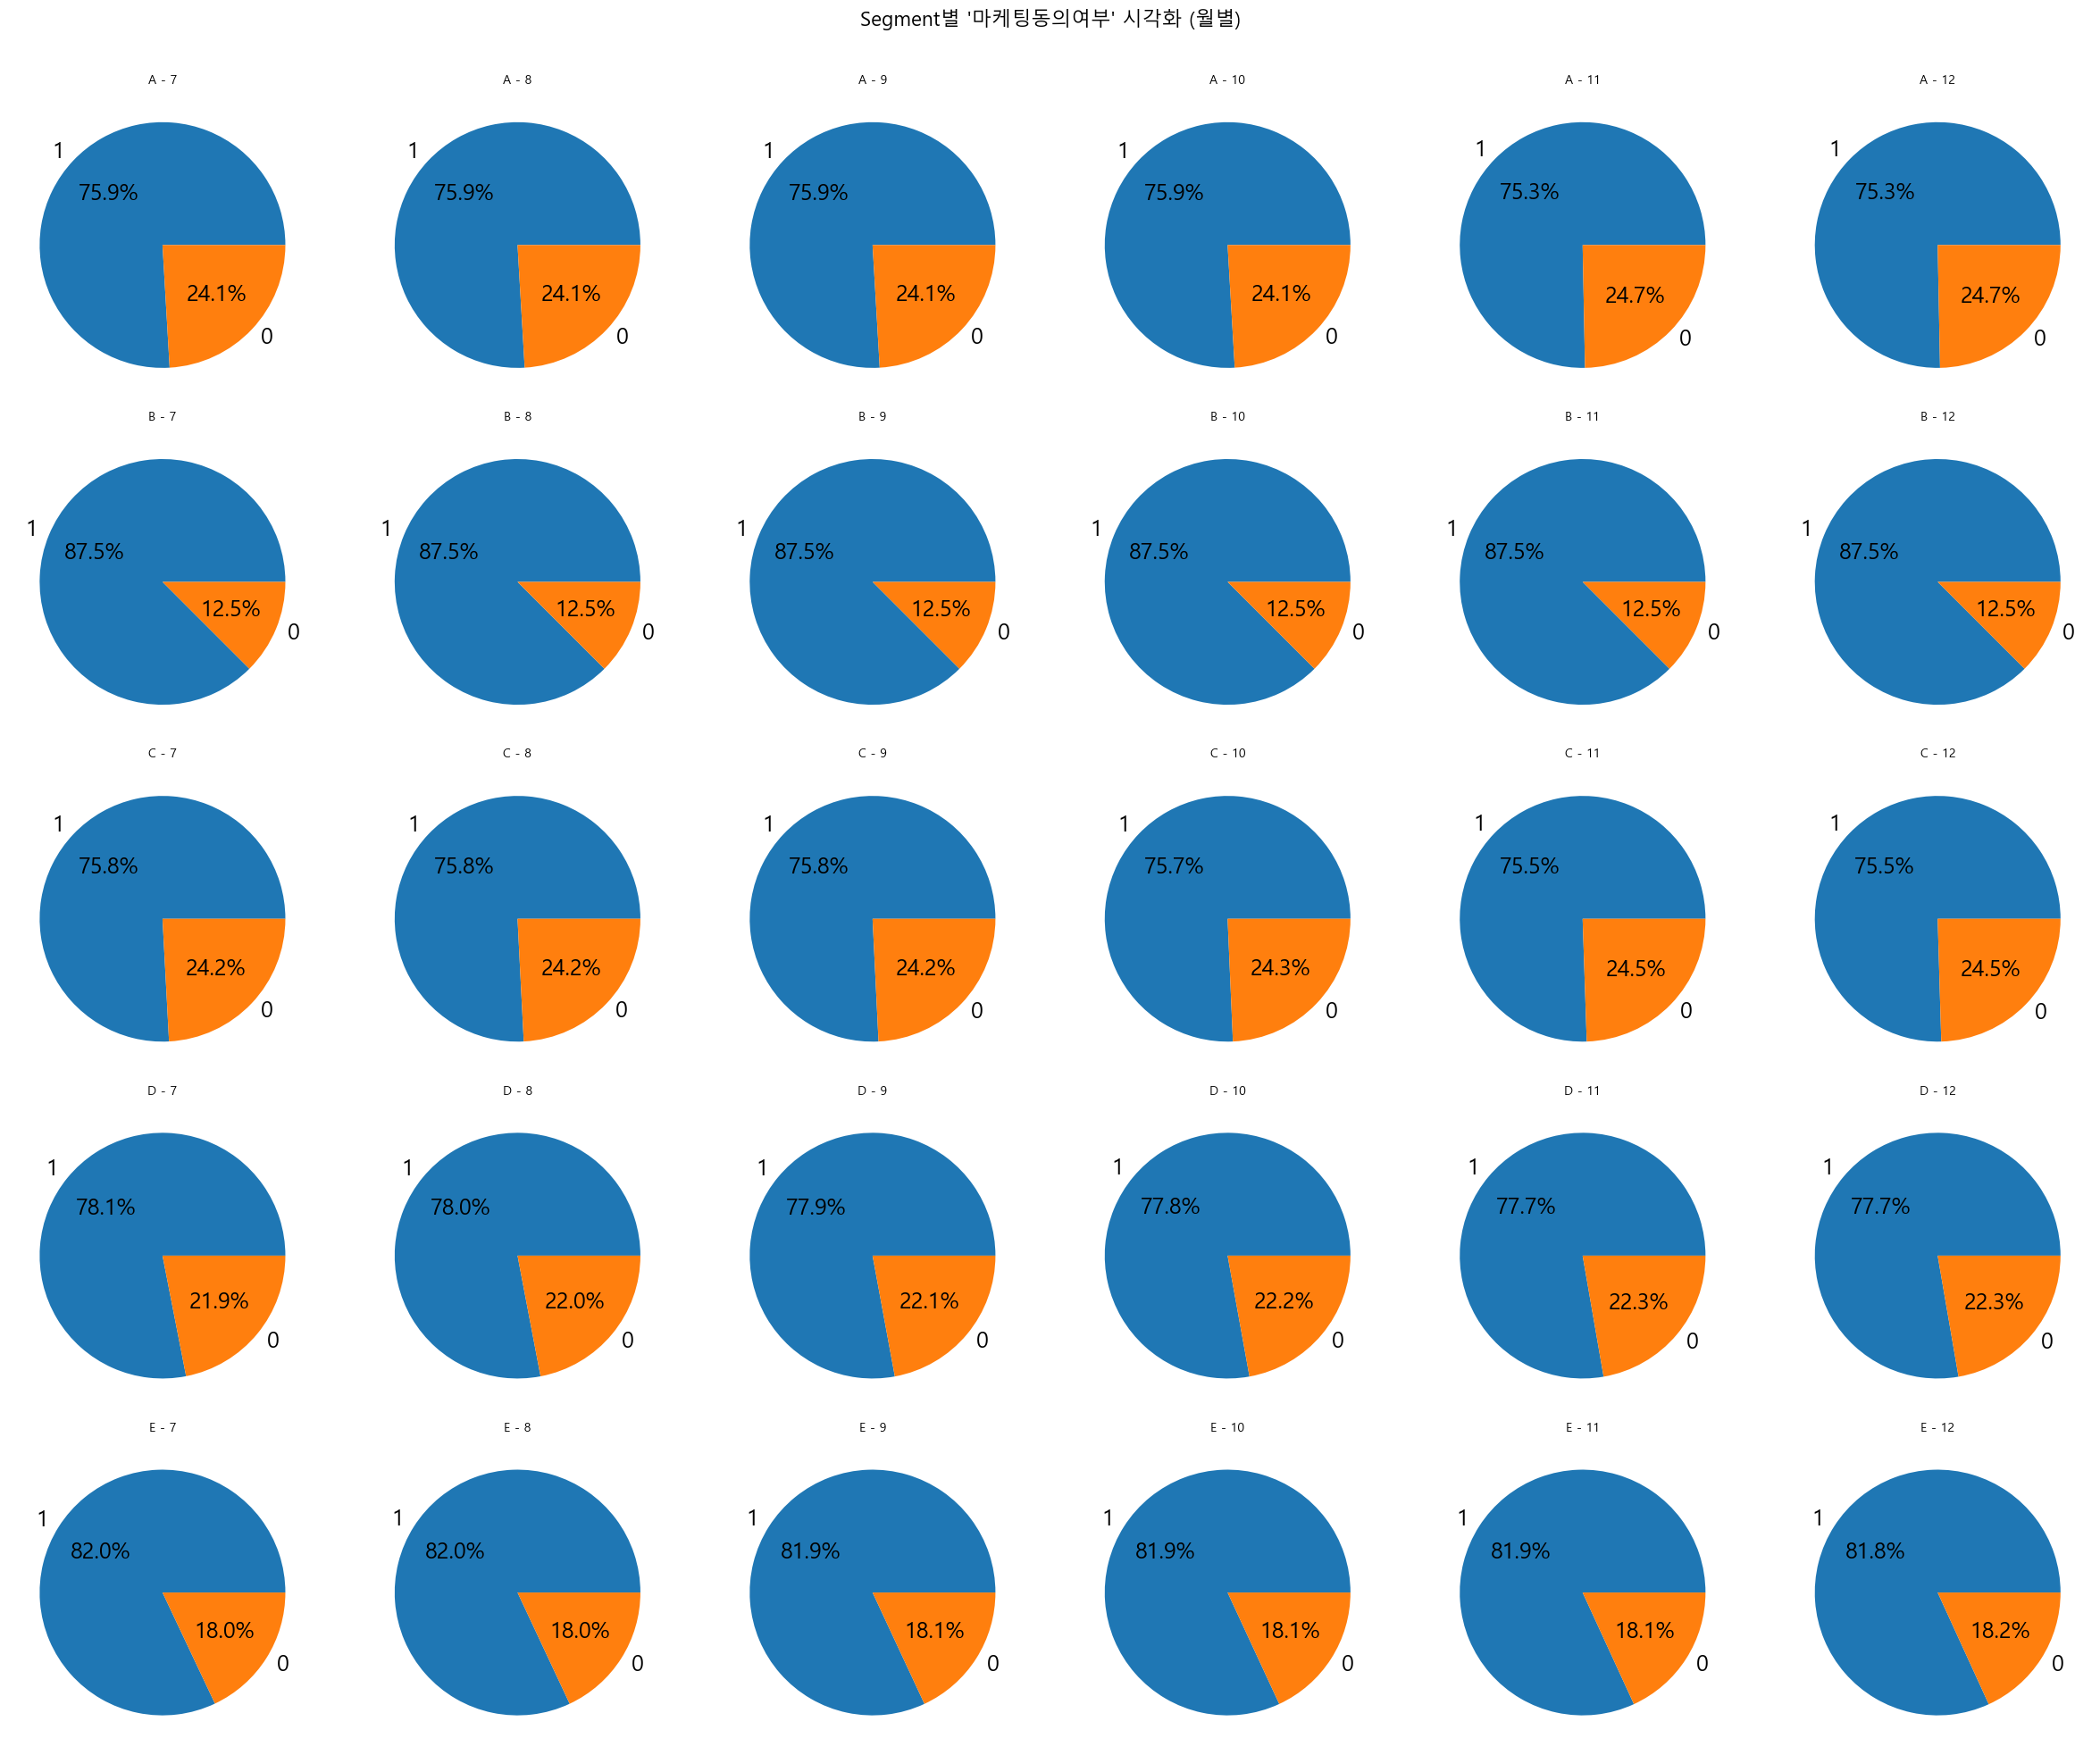

In [7]:
plot_segment_grid(dfs = customers,
                  col = "마케팅동의여부",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (4, 4))

수신 거부 여부에도 차이가 좀 있고, 마케팅 동의 여부에도 차이가 좀 있는데,

뭔가 내가 생각하기에 이게 Segment를 분류하는 기준이 될 것 같지는 않아 보임.

### 가입통신회사코드

이것도 의미가 없을 것으로보임.

왜냐면 내가 생각하기에 segment를 나누어둔 기준이 있을 것이고, 그 기준은 금융과 관련된 기준일 것 같음.

근데 통신사는 의미가 크게 없을 것 같음.

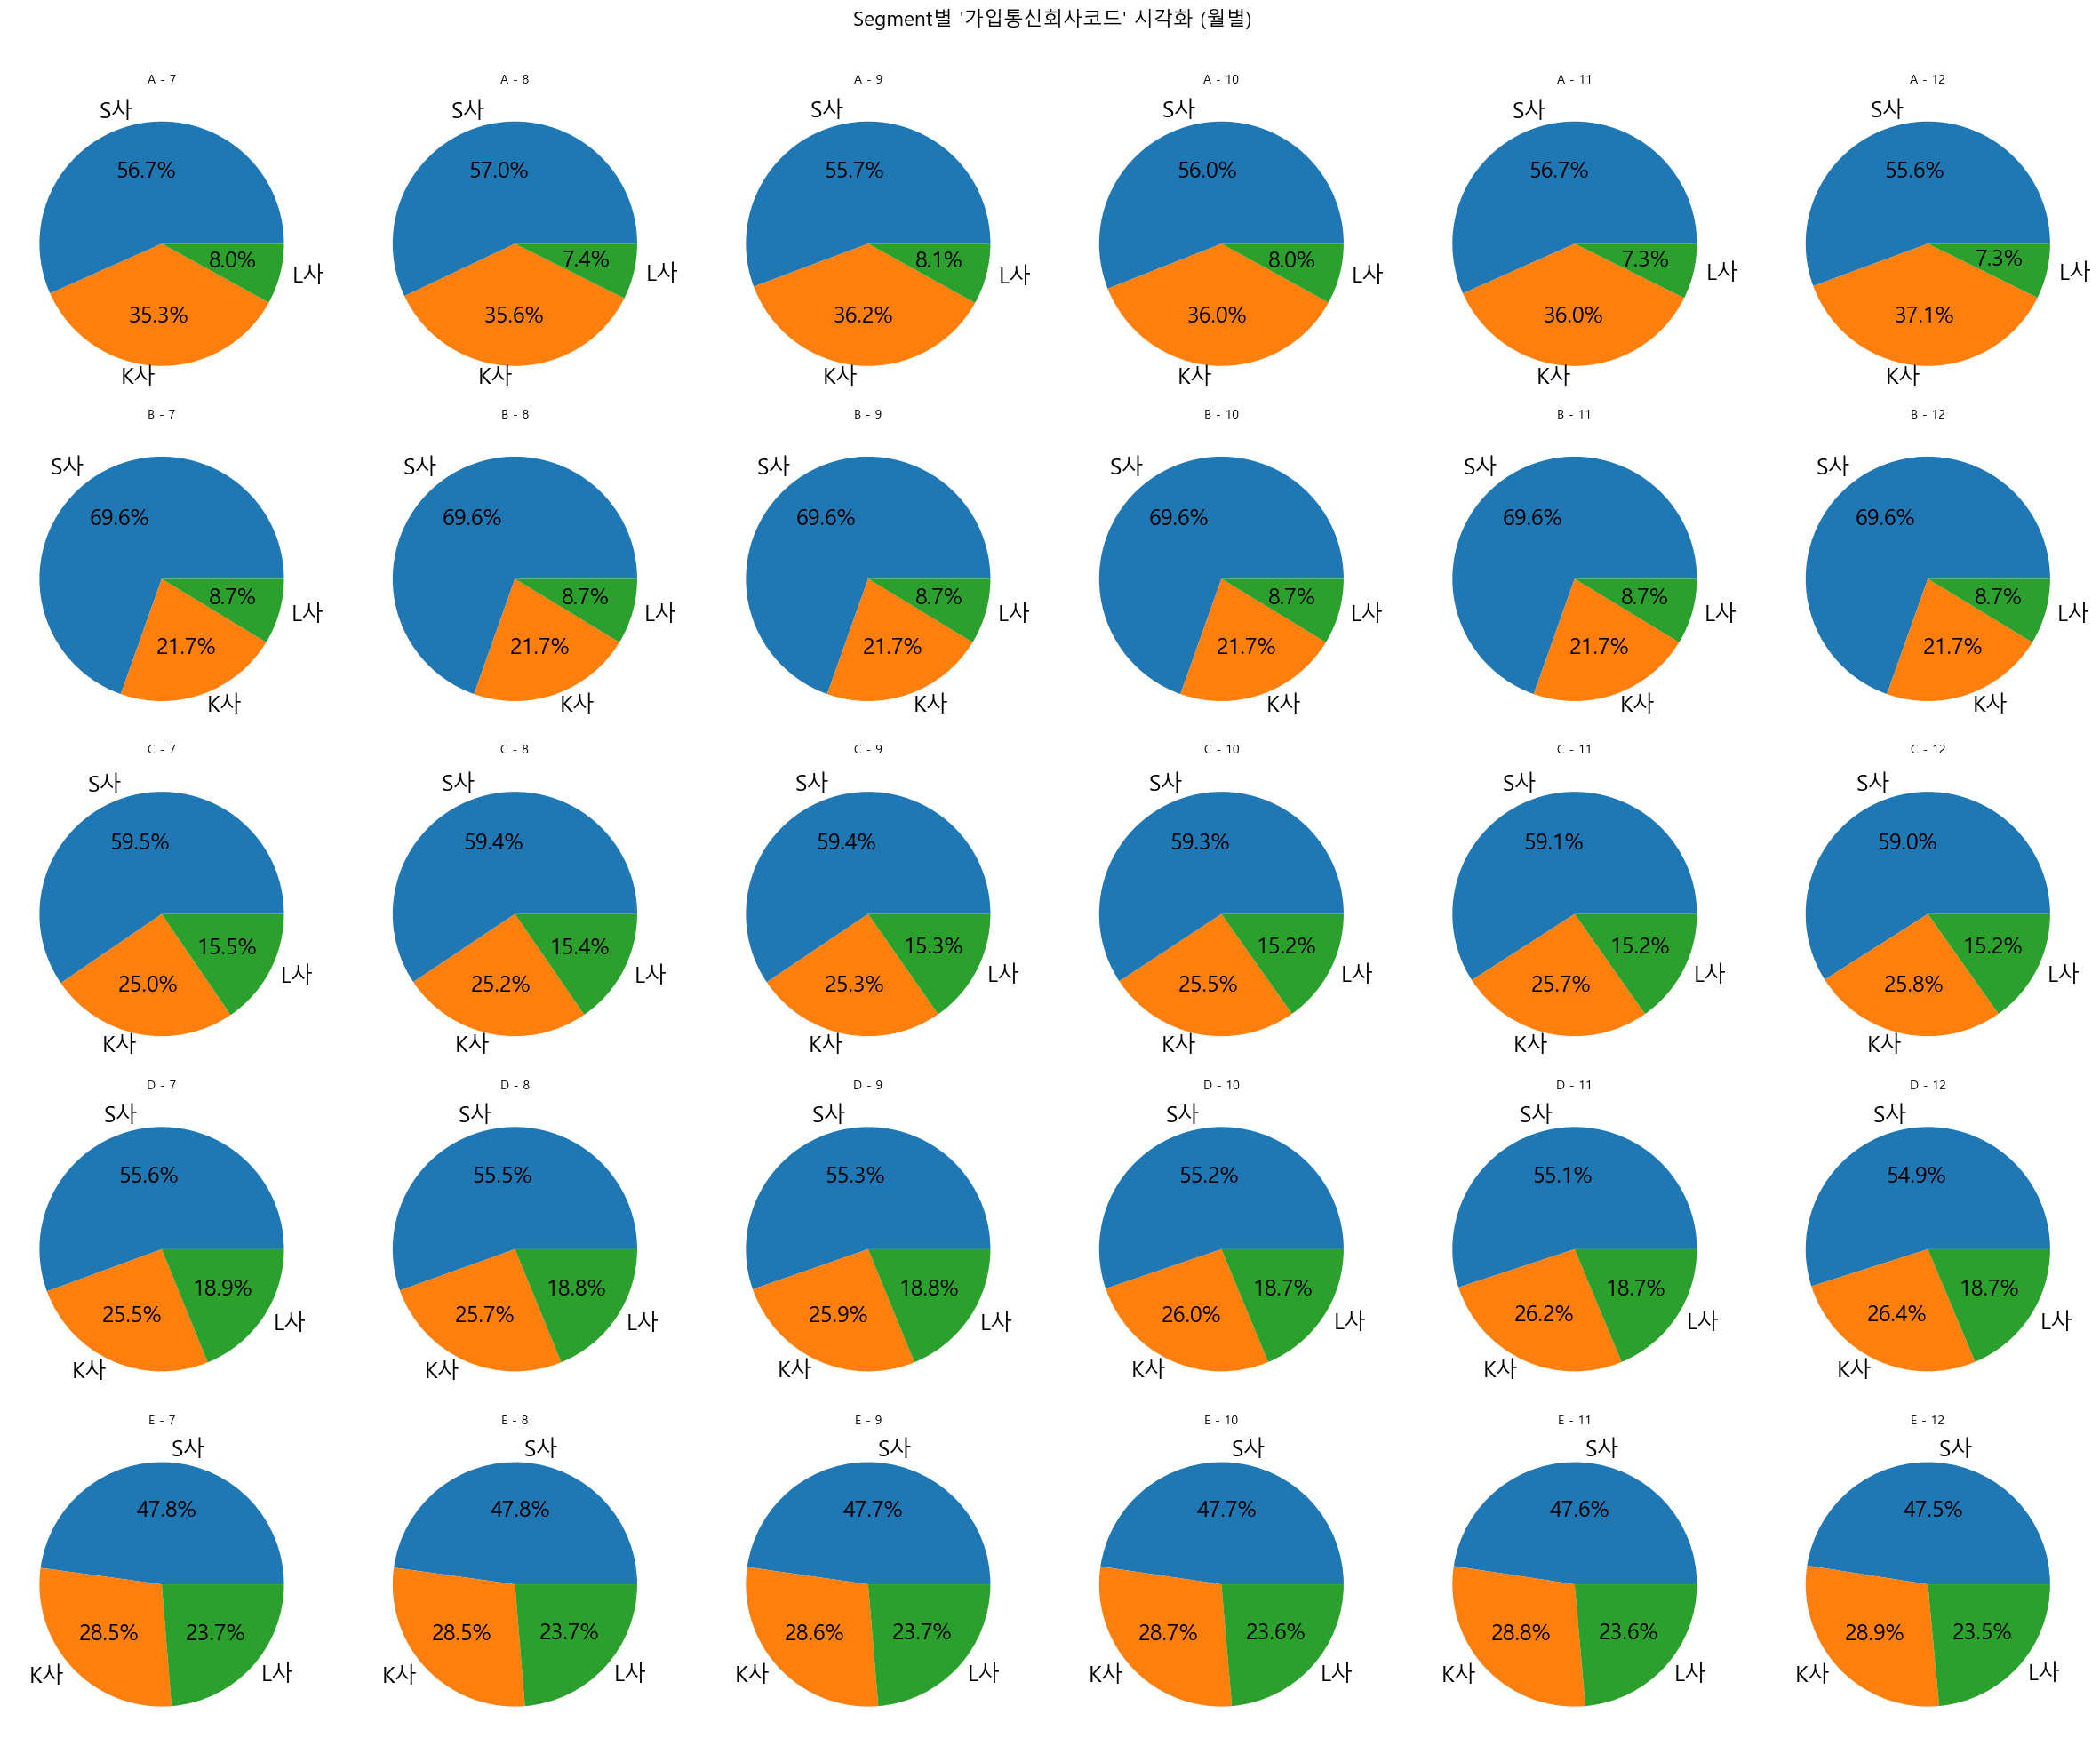

In [8]:
plot_segment_grid(dfs = customers,
                  col = "가입통신회사코드",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (4, 4))